In [11]:
from scipy.io import loadmat
import numpy as np
from cartopy import config
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter

# 1
Autotrophic organisms can produce their on food using light (via
photosynthesis).  In contrast, heterotrophic organisms eat other
organisms for food.

Phytoplankton - autotrophic mostly.  However, some can be heterotrophic because diatoms, dinoflaggelates and coccolithophores are phytoplankton and each of these can be both autotrophic and heterotrophic.

Zooplankton - heterotrophic

Fish - heterotrophic

Bacteria - most are heterotrophic but some are autotrophs.  For example, cyanobacteria are a type of autotrophic bacteria. 

Diatoms - most are autotrophic, but some can be heterotrophic.  Lewin (1958) found that 13 of 42 tested cultures were capable of growing heterotrophically.

Dinoflagellates - both.  Dinoflagellates can photosynthesize and also ingest organic particles.  Sometimes they can ingest an autotroph and aquire the ability to photosynthesize.

Coccolithophores - both.  Coccolithophores can photosynthesize and some can absorb organic matter

# 2

The f-ratio is the fraction of NPP that is sources from new nutrients

$f = \frac{new}{NPP}$

The e-ratio is the fraction of NPP that leaves the euphotic zone.

$e = \frac{export}{NPP}$

The assumption that the e-ration is the same as the f-ration over large spatial and temporal scales implies that the new production and the export production are the same over these scales.


# 3
ballast minerals are dense minerals that form shells around some phytoplankton (ex: calcium carbonate)

$z* = \frac{w_{sink}}{k_{remin}}$

1) Ballast minerals make the organic matter larger (larger radius), which will make it sink faster (increase in $w_{sink}$)

2) Ballast minerals will protect phytoplankton from being eaten as quickly which will increase the remineralization length scale

# 4
Based on the equation and code below, $\textbf{B}$ will sink faster.

$w_{sink} = \frac{2gr^2(\rho_p - \rho_w)}{9\mu}$ where r is the particle radius, $\rho_p$ and $\rho_w$ are the densities of the particle and sea water, respectively, and $\mu$ is the seawater viscosity.

In [2]:
###### 4 ######
OM_a = 0.9 #fraction organic matter
OM_b = 0.75
CaCO3_a = 0.02 #fraction calcium carbonate
CaCO3_b = 0.2
opal_a = 0.08 #fraction opal
opal_b = 0.05
r_a = 50*10**(-6) #radius (m)
r_b = 40*10**(-6)

rho_om = 1060 #density organic matter (kg/m^3)
rho_ca = 2710 #density CaCO3 (kg/m^3)
rho_opal = 2100 #density opal (kg/m^3)
g = 9.8 #gravitational acceleration (m/s^2)
rho_w = 1027 #average density sea water (kg/m^3)
mu = 1.88*10**(-3) #sea water viscosity (Pa s)

rho_a = rho_om*OM_a + rho_ca*CaCO3_a + rho_opal*opal_a #density of A
rho_b = rho_om*OM_b + rho_ca*CaCO3_b + rho_opal*opal_b #density of B
w_a = (2*g*r_a**2*(rho_a - rho_w))/(9*mu) #sinking velocity for A
w_b = (2*g*r_b**2*(rho_b - rho_w))/(9*mu) #sinking velocity for A

print(f'Sinking velocity of A = {w_a:0.3e} m/s')
print(f'Sinking velocity of B = {w_b:0.3e} m/s')



Sinking velocity of A = 4.321e-04 m/s
Sinking velocity of B = 7.692e-04 m/s


# 5

At a salinity of 35 and a potential temperature of $0^\circ C$, the saturation concentration of $O_2$ ($[O_2]_{equil}$) is 359.1 $mmol/m^3$ (from Table 3.2.4).  The equation below is used to calculate the Apparent Oxygen Utilization (AOU):

$AOU = [O_2]_{equil} - [O_2]_{obs}$

In [64]:
equil = 359.1 #(mmol/m^3) saturation concentration of O2 for salinity of 35 and potential temp of 0C
obs = 120 #(mmol/m^3) observed O2 concentration
AOU = equil - obs

print(f'The Apparent Oxygen Utilization is: {AOU:0.2f} mmol/m^3')

The Apparent Oxygen Utilization is: 239.10 mmol/m^3


# 6
### a
The C:N:P ratio is 106:16:1
### b
The chemical equation for this reaction is: $(CH_2)_{30}(CH_2O)_{76}(NH_3)_{16}(H_3PO_4) + ?O_2 -> 106CO_2 + 16HNO3 + H_3PO_4 + ?H_2O$

To balance the hydrogen moles on the left side of the reaction there needs to be 122 moles of $H_2O$ on the right.

To balance the oxygen on the right side, there needs to be 153 moles of $O_2$ on the left.

Thus, $\textbf{153}$ moles of $O_2$ are required

### c

Please see the image included in this project for my work for this question (if it doesn't appear in the code)
<img src="IMG_2651.PNG">

# 7

The concentration of Calcium hardly varies in sea water and has a long residence time.  This means that any change in the Cd/Ca ratio is the result of a change in the ocean distribution of Cadmium.  The distribution of Cadmium is similar to that of nutrient elements (Nitrogen, Phosphorous, etc).  This means that the concentration of Cadmium is lowest in surface waters and its concentration is highest in the deep North Pacific.  An abrupt reduction in nutrient upwelling in the North Pacific would result in lower nutrient and Cadmium concentrations at the surface meaning that less Cadmium is available to create shells for phytoplankton compared to Calcium.  This will result in a decrease in the Cd/Ca ratio taken from sediment core as less Cadmium shells are found in the sediment.  This result is consistent with what is seen in Figure 1, which is a sharp decrease in the Cd/Ca ratio.

In [3]:
par = loadmat('par.mat')['par']
sst = loadmat('sst.mat')['sst']
chl = loadmat('chl.mat')['chl']
(x,y) = sst.shape

lat=np.linspace(-90,89,x)
lon=np.linspace(-180,179,y)



In [4]:
def Lod(lat, yDay):
 ## get lat in radians
    gamma = lat / 180.0 * np.pi;

 ## convert date into an angle
    psi = yDay / 365.0 * 2.0 * np.pi;

 ## calc solar declination
    solarDec = (0.39637- 22.9133 * np.cos(psi)+ 4.02543 * np.sin(psi)- 0.38720 * np.cos(2*psi)+ 0.05200 * np.sin(2*psi)) *np.pi / 180.0;

    r = -np.tan(gamma) * np.tan(solarDec);
    if(r <= -1):
        return 24.0;
    elif(np.abs(r) < 1):
        return 24.0 * np.arccos(r) / np.pi;
    else:
        return 0;


In [7]:
def npp_calc(sst, chl, par,lat):
    # calculate par function
    fpar = 0.66125*par/(par + 4.1)
    
    #Pb_opt
    if (sst < -10.0): 
        pb_opt = 0; 
    elif (sst <  -1.0): 
        pb_opt = 1.13; 
    elif (sst >  28.5): 
        pb_opt = 4.00;
    else:
        pb_opt = 1.2956 + 2.749e-1*sst + 6.17e-2*sst**2 - 2.05e-2*sst**3+ 2.462e-3*sst**4 - 1.348e-4*sst**5 + 3.4132e-6*sst**6 - 3.27e-8*sst**7
    
    #Euphotic zone depth
    if (chl <  1.0):
        chl_tot = 38.0 * chl**0.425;
    else:
        chl_tot = 40.2 * chl**0.507;


    z_eu = 200.0 * chl_tot**-.293;

    if (z_eu <= 102.0): 
        z_eu = 568.2 * chl_tot**-.746;
        
    # calculate day length based on latitude and day of year (October 1)
    D = 274 #day of year for October 1
    day_length = Lod(lat, D)
    #P = np.arcsin(0.39795*np.cos(.2163108+2*np.arctan(0.9671396*np.tan(0.00860*(D - 186)))))
    #day_length = 24 - (24/np.pi)*np.arccos((np.sin(0.8333*np.pi/180)+np.sin(lat*np.pi/180)*np.sin(P))/(np.cos(lat*np.pi/180)*np.cos(P)))
    
    npp = pb_opt * chl  * fpar * z_eu * day_length
    return npp, day_length
    

In [8]:
# I know this isn't the most efficient code
npp = np.zeros((x,y))
d = np.zeros((x,y))

for i in range(x):
    for j in range(y):
        if ~np.isnan(sst[i,j]):
            npp[i,j], d[i,j] = npp_calc(sst[i,j], chl[i,j],par[i,j], lat[i])

In [9]:
#Dunne et al model
e  = np.abs(-0.0081 * sst + 0.0806*np.log(chl) + 0.426)
export = e*npp


C:\Users\ddunmire\Miniconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in log
  """Entry point for launching an IPython kernel.


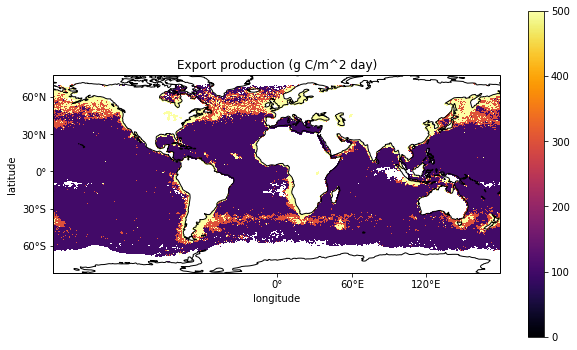

In [20]:
plt.figure(figsize=(10,6))

ax = plt.axes(projection=ccrs.PlateCarree())
plt.title('Export production (g C/m^2 day)')
ax.coastlines()
ax.set_xticks([180, 240, 300, 0, 60, 120,180], crs=ccrs.PlateCarree()) #not sure why some of my x ticks are missing in the plot
ax.set_yticks([-90, -60, -30, 0, 30, 60, 90], crs=ccrs.PlateCarree())
lon_formatter = LongitudeFormatter()
lat_formatter = LatitudeFormatter()
ax.xaxis.set_major_formatter(lon_formatter)
ax.yaxis.set_major_formatter(lat_formatter)

plt.contourf(lon, lat, np.flipud(export), 60, vmin = 0, vmax = 500, cmap = 'inferno', transform=ccrs.PlateCarree())

plt.xlabel('longitude')
plt.ylabel('latitude')
m = plt.cm.ScalarMappable(cmap='inferno')
m.set_array(export)
m.set_clim(0., 500.)
plt.colorbar(m)
plt.show()

Export production is the amount of organic matter produced by primary production that exits the euphotic zone and does not get remineralized in the euphotic zone.  Export production is higher in coastal areas and in high latitude regions (where upwelling occurs) and lower in the central ocean and the mid-latitudes (where downwelling occurs).  These patterns make sense because export production is higher in regions with higher NPP.  You can expect that in regions where more organic matter is produced, a greater amount will also exit the euphotic zone.